# **ML Assignment 8**

By 23520011 - Sharaneshwar Punjal

1. PFA the data with dependant variable y and independent variable x.

2. Fit a polynomial regression model (y modelled as linear function of various higher degree terms of x) in following steps:

3. 80:20 split into train and test set.

4. Create 30 samples of size 20 each.  
   - For each of the sample:  
      - Incrementally fit polynomials of degree upto 10.  
      - Measure train accuracy using 20 train data points and test accuracy using the full test set.  
   - Use violin plot to observe the fluctuations in test error corresponding to the degree.  
   - Create another violin plot of degree vs (train error – test error).

5. From the training data sample 20 points.  
   - Use k=5 fold cross validation to determine the highest degree polynomial you should fit on this sample.  
   - Once you finalise the highest degree, train the model of that degree on the 20 sample points.  
   - Use the above model to measure accuracy of model on the test set.

6. On the full train data, use k(=10) fold cross validation as well as l1 and l2 regularisation to fit a polynomial and measure accuracy on test data.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### 1. Importing the CSV File

In [2]:
df = pd.read_csv('polynomial_regression.csv')
print(df)

                y          x
0     -222.223471  -5.391842
1     2680.550008  12.781783
2      768.932138   6.116727
3    -1524.077688 -15.703778
4       49.374012   0.275919
...           ...        ...
9995  1221.966544 -26.977123
9996 -1912.963176 -18.494062
9997  -844.826111 -11.213117
9998  1821.510001   9.721350
9999   717.859196   5.621352

[10000 rows x 2 columns]


### 2. Train Test Split 

In [3]:
from sklearn.model_selection import train_test_split

X = df['x']
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.utils import resample

# Create 30 samples of 20 points each from X_train
samples = []
for i in range(30):
  sample = resample(X_train, n_samples=20, replace=False, random_state=i)
  samples.append(sample)
samples

[1294     8.630659
 2622     0.569742
 2740    -5.486335
 6835   -11.613213
 6347    12.193506
 1456    -6.546141
 6592    -0.676754
 2944    -5.417511
 1174     9.684332
 2782    -9.144658
 6281   -17.993844
 3650   -10.808936
 1667   -13.692651
 6985    -9.171148
 8234    -2.855146
 3102    -1.697864
 7706    -0.397525
 6335    -1.070014
 162      4.697314
 3950    -1.044528
 Name: x, dtype: float64,
 9658    -0.414689
 3586    -8.050883
 1819    -8.361037
 5939    16.190202
 6386   -17.765548
 1268    -3.402052
 679     -8.218065
 945      3.072287
 5424     3.221696
 6495    -1.988188
 7928     2.682527
 9798    -6.951869
 2121    -4.098537
 7007     3.572905
 732    -25.209548
 8514     3.162898
 9935   -12.181088
 5241     3.767039
 8603    -9.262753
 4977    -2.986894
 Name: x, dtype: float64,
 8557   -13.343538
 981    -17.442173
 6694    -9.030698
 2023   -23.441143
 8923     4.333341
 2460     0.300187
 8859   -11.663107
 9491     8.663762
 8161    -1.191760
 3696    -5.12118

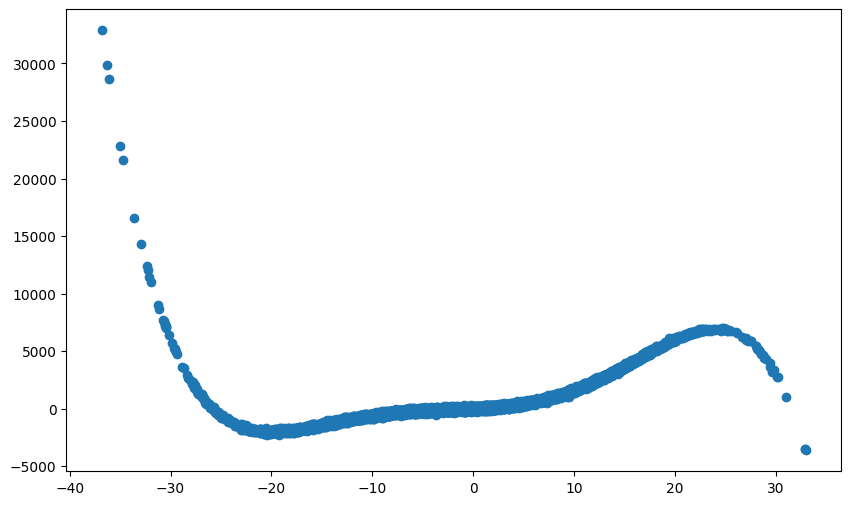

In [5]:
# Create a scatter plot showing how y is predicted by x
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Actual Data')
plt.show()

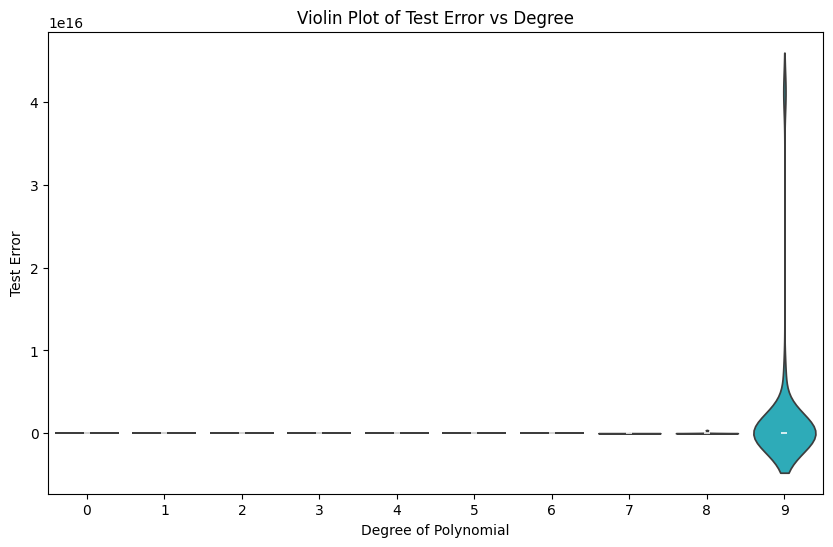

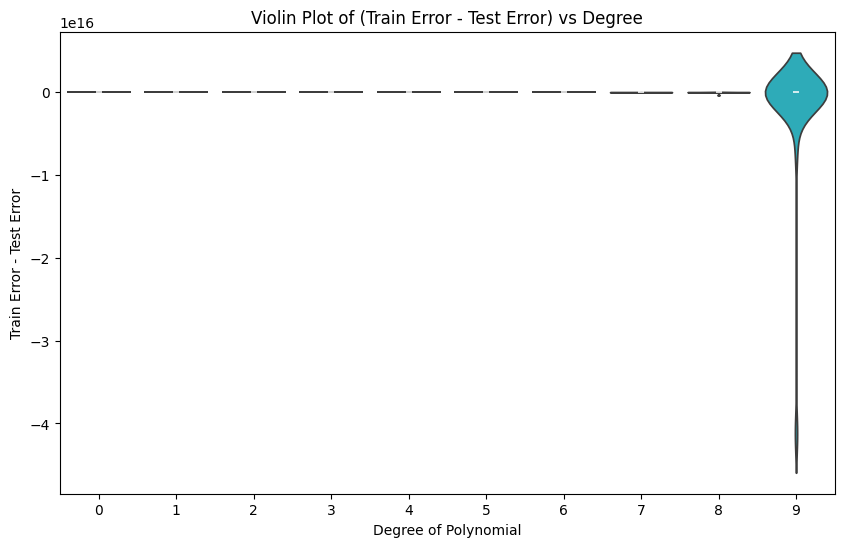

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


train_errors = []
test_errors = []
degrees = range(1, 11)

for i in range(len(samples)):
    train_err_for_sample = []
    test_err_for_sample = []
    for degree in degrees:
        # Polynomial Feature generation
        poly = PolynomialFeatures(degree=degree)
        
        # reshape(-1, 1) Converts 1D data to 2D as required by scikit-learn
        X_poly_train = poly.fit_transform(samples[i].values.reshape(-1, 1))
        X_poly_test = poly.transform(X_test.values.reshape(-1, 1))

        # Linear Regression
        model = LinearRegression()
        model.fit(X_poly_train, y_train[samples[i].index])

        # Predictions
        y_train_pred = model.predict(X_poly_train)
        y_test_pred = model.predict(X_poly_test)

        # Calculate Errors
        train_error = mean_squared_error(y_train[samples[i].index], y_train_pred)
        test_error = mean_squared_error(y_test, y_test_pred)

        train_err_for_sample.append(train_error)
        test_err_for_sample.append(test_error)
        train_errors.append(train_err_for_sample)
        test_errors.append(test_err_for_sample)

# Convert lists to numpy arrays for easier plotting
train_errors = np.array(train_errors)
test_errors = np.array(test_errors)

# Violin Plots
plt.figure(figsize=(10, 6))
sns.violinplot(data=test_errors)
plt.xlabel("Degree of Polynomial")
plt.ylabel("Test Error")
plt.title("Violin Plot of Test Error vs Degree")
plt.show()

plt.figure(figsize=(10,6))
sns.violinplot(data = train_errors - test_errors)
plt.xlabel("Degree of Polynomial")
plt.ylabel("Train Error - Test Error")
plt.title("Violin Plot of (Train Error - Test Error) vs Degree")
plt.show()



Best polynomial degree: 2 (Avg. CV MSE: 409386.2842)
R2 Score on test set: 0.6968


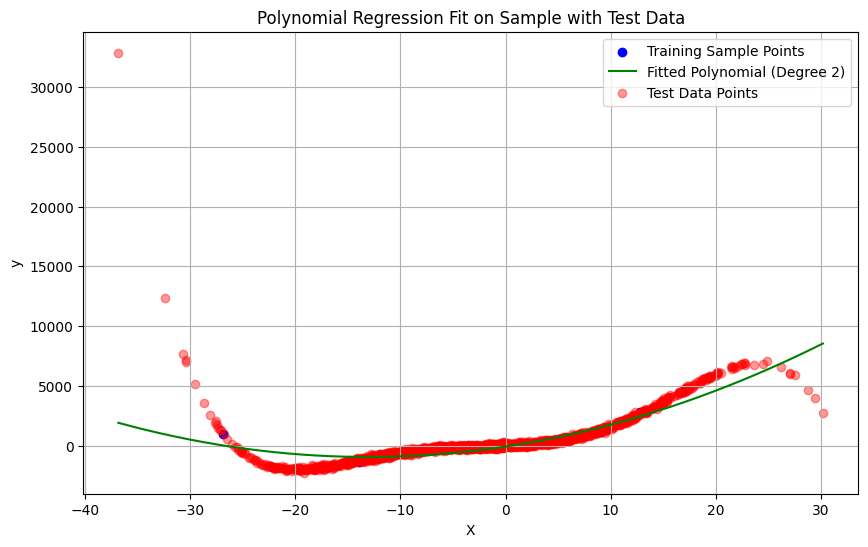

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.utils import resample

# Sample 20 points from X_train
sample = resample(X_train, n_samples=20, replace=True, random_state=0)
sample_indices = sample.index

# ------------- Step 5.a: K-Fold CV to Choose Best Degree -------------
best_degree = 0
min_error = float('inf')
kf = KFold(n_splits=5)

for degree in range(1, 11):
    total_error = 0
    for train_idx, val_idx in kf.split(sample):
        X_train_fold = sample.iloc[train_idx]
        y_train_fold = y_train[X_train_fold.index]
        X_val_fold = sample.iloc[val_idx]
        y_val_fold = y_train[X_val_fold.index]

        poly = PolynomialFeatures(degree=degree)
        X_poly_train = poly.fit_transform(X_train_fold.values.reshape(-1, 1))
        X_poly_val = poly.transform(X_val_fold.values.reshape(-1, 1))

        model = LinearRegression()
        model.fit(X_poly_train, y_train_fold)

        y_val_pred = model.predict(X_poly_val)
        total_error += mean_squared_error(y_val_fold, y_val_pred)

    avg_error = total_error / 5
    if avg_error < min_error:
        min_error = avg_error
        best_degree = degree

print(f"\nBest polynomial degree: {best_degree} (Avg. CV MSE: {min_error:.4f})")

# ------------- Step 5.b: Train Final Model on Sample with Best Degree -------------
poly = PolynomialFeatures(degree=best_degree)
X_poly_train = poly.fit_transform(sample.values.reshape(-1, 1))
y_sample = y_train[sample.index]

model = LinearRegression()
model.fit(X_poly_train, y_sample)

# ------------- Step 5.c: Evaluate on Test Set -------------
X_poly_test = poly.transform(X_test.values.reshape(-1, 1))
y_test_pred = model.predict(X_poly_test)

r2 = r2_score(y_test, y_test_pred)
print(f"R2 Score on test set: {r2:.4f}")

# ------------- Plotting: Fitted Curve + Sample + Test Points -------------
x_range = np.linspace(min(min(sample), min(X_test)), max(max(sample), max(X_test)), 200)
x_range_poly = poly.transform(x_range.reshape(-1, 1))
y_range_pred = model.predict(x_range_poly)

plt.figure(figsize=(10, 6))
plt.scatter(sample, y_sample, color='blue', label='Training Sample Points')
plt.plot(x_range, y_range_pred, color='green', label=f'Fitted Polynomial (Degree {best_degree})')
plt.scatter(X_test, y_test, color='red', alpha=0.4, label='Test Data Points')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression Fit on Sample with Test Data")
plt.legend()
plt.grid(True)
plt.show()


The model selected polynomial degree 2 as the best based on 5-fold cross-validation over a small resampled training set (20 points).
The average CV MSE for degree 2 was 409,386.2842, which was the lowest across degrees 1 to 10 in your experiment.
This suggests that quadratic regression (parabola) balances bias and variance well on this small training subset.


In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures

# Ridge CV
ridge_model = make_pipeline(PolynomialFeatures(degree=5), Ridge(alpha=0.1))
ridge_scores = cross_val_score(ridge_model, X_train.values.reshape(-1, 1), y_train,
                               scoring='r2', cv=10)
print("Ridge CV r2 (mean):", ridge_scores.mean())

# Lasso CV
lasso_model = make_pipeline(PolynomialFeatures(degree=4), Lasso(alpha=0.1, max_iter=10000))
lasso_scores = cross_val_score(lasso_model, X_train.values.reshape(-1, 1), y_train,
                               scoring='r2', cv=10)
print("Lasso CV r2 (mean):", lasso_scores.mean())


Ridge CV r2 (mean): 0.9963938657495417
Lasso CV r2 (mean): 0.7848211287768099


#### Observations:
- Ridge regression (degree 5) achieved a very high mean R² score of 0.9964, indicating an excellent fit with strong generalization due to effective regularization.
- Lasso regression (degree 4) had a lower mean R² score of 0.7848, suggesting possible underfitting — likely because Lasso shrinks some polynomial coefficients to zero.
- Ridge is more suitable for this dataset, while Lasso may need parameter tuning or a higher-degree polynomial to improve performance.